In [192]:
# support functions
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

def create_LDU(A, L, D, U):
    n = len(A)
    for i in range(n):
        D[i, i] = A[i, i]
        if (i > 0):
            for j in range(i):
                L[i, j] = A[i, j]
        if (i < n - 1):
            for j in range(i + 1, n):
                U[i, j] = A[i, j]

# Gauss method

In [193]:
def gauss_method(A, b):
    n = len(A) # Matrix size
    b1 = copy.deepcopy(b)
    A1 = copy.deepcopy(A)
    for k in range(n):
        # Choose the main element
        max_elem = A1[k][k] # max element in column
        row_max_elem = k
        for m in range(k + 1, n):
            if (abs(A1[m][k]) > abs(max_elem)):
                max_elem = A1[m][k]
                row_max_elem = m
            A1[k], A1[row_max_elem] = A1[row_max_elem], A1[k]
            b1[k], b1[row_max_elem] = b1[row_max_elem], b1[k]
    
        if (A1[k][k] == 0):
            print("Can`t solve the system of equations")
        else: 
            for m in range(k + 1, n):
                coeff = -A1[m][k] / A1[k][k]
                for l in range(k, n):
                    A1[m][l] += A1[k][l] * coeff
                b1[m] += b1[k] * coeff
    
    x = [0] * n
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i, n):
            sum += A1[i][j] * x[j]
        x[i] = (b1[i] - sum) / A1[i][i]   
    return x
    

def gauss_method_verification(A, b):
    n = len(A)
    x = gauss_method(A, b)
    for i in range(n):
        sum = 0
        for j in range(n):
            sum += A[i][j] * x[j]
        if ((sum - b[i]) > 1e-6):
            print("The system of equations were solved unsuccesfully")
            return False
    print("The system of equations were solved succefully")
    return True

In [195]:
A = [[2, 2, 3], [1, -1, 0], [-1, 2, 1]]
b = [1, 0, 2]
print(gauss_method(A, b))
print(gauss_method_verification(A, b))

[-5.000000000000003, -5.000000000000004, 7.000000000000005]
The system of equations were solved succefully
True


# LU

In [196]:
def lu_method(A, b):
    n = len(A)
    L = [[0] * n for i in range(n)]
    b1 = copy.deepcopy(b)
    A1 = copy.deepcopy(A)
    for k in range(n):
        L[k][k] = 1
        max_elem = A1[k][k]
        row_max_elem = k
        for m in range(k + 1, n):
            if (abs(A1[m][k]) > abs(max_elem)):
                max_elem = A1[m][k]
                row_max_elem = m
            A1[k], A1[row_max_elem] = A1[row_max_elem], A1[k]
            b1[k], b1[row_max_elem] = b1[row_max_elem], b1[k]
    for k in range(n):
        if (A1[k][k] == 0):
            print("Can`t solve the system of equations")
        else: 
            for m in range(k + 1, n):
                coeff = -A1[m][k] / A1[k][k]
                for l in range(k, n):
                    A1[m][l] += A1[k][l] * coeff
                L[m][k] = -coeff
        
    U = A1
    for k in range(n):
        L[k][k] = 1
    v = [0] * n
    for k in range(0, n):
        sum = 0
        for j in range(k):
            sum -= L[k][j] * v[j]
        v[k] = b1[k] + sum
        
    x = [0] * n
    for k in range(n - 1, -1, -1):
        sum = 0
        for j in range(k + 1, n):
            sum -= U[k][j] * x[j]
        x[k] = (v[k] + sum) / U[k][k]
    return x

def lu_method_verification(A, b):
    n = len(A)
    x = lu_method(A, b)
    for i in range(n):
        sum = 0
        for j in range(n):
            sum += A[i][j] * x[j]
        if ((sum - b[i]) > 1e-6):
            print("The system of equations were solved unsuccesfully")
            return False
    print("The system of equations were solved succefully")
    return True

In [197]:
A = [[2, 2, 3], [1, -1, 0], [-1, 2, 1]]
b = [1, 0, 2]
print(lu_method(A, b))
print(lu_method_verification(A, b))

[-5.000000000000003, -5.000000000000004, 7.000000000000005]
The system of equations were solved succefully
True


# Seidel method

In [198]:
def seidel_method(A, b, x0, N):
    # N - number of operations
    # x0 - vector of initial values
    n = len(A)
    L = np.array([[0]*n for i in range(n)])
    D = np.array([[0]*n for i in range(n)])
    U = np.array([[0]*n for i in range(n)])
    create_LDU(A, L, D, U)
    x = x0
    B = -np.dot(np.linalg.inv(L+D), U)
    C = np.linalg.inv(L + D)
    for it in range(N):
        x = B.dot(x) + C.dot(b)
    return x

def seidel_method_verification(A, b, x0):
    N = 50
    x = list(i for i in range(N))
    y = []
    for i in range(N):
        xs = seidel_method(A, b, x0, i)
        y.append(math.dist(np.dot(A, xs) , b))
    plt.yscale("log")
    plt.xscale("log")
    plt.title("Seidel Residual")
    plt.plot(x, y, 'go', linestyle = '--')
    plt.xlabel("N")
    plt.ylabel("Absolute error")

x = [-5. -5.  7.]


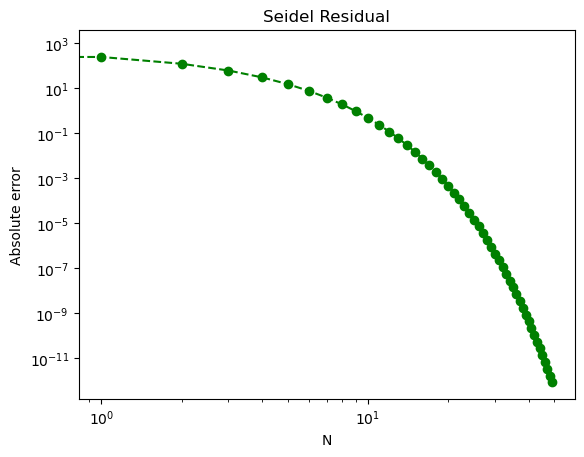

In [199]:
A = np.array([[2, 2, 3], [1, -1, 0], [-1, 2, 1]])
b = np.array([1, 0, 2])
x0 = np.array([100, 100, 100])
x = seidel_method(A, b, x0, 100)
print(f'x = {x}')
seidel_method_verification(A, b, x0)

# Jacobi method

In [200]:
def jacobi_method(A, b, x0, N):
    n = len(A)
    L = np.array([[0]*n for i in range(n)])
    D = np.array([[0]*n for i in range(n)])
    U = np.array([[0]*n for i in range(n)])
    create_LDU(A, L, D, U)
    x = x0
    C = np.linalg.inv(D)
    B = -np.dot(C, L + U)
    for it in range(N):
        x = B.dot(x) + C.dot(b)
    return x

def jacobi_method_verification(A, b, x0):
    N = 60
    x = list(i for i in range(N))
    y = []
    for i in range(N):
        xs = jacobi_method(A, b, x0, i)
        y.append(math.dist(np.dot(A, xs) , b))
    plt.yscale("log")
    plt.xscale("log")
    plt.title("Jacobi Residual")
    plt.plot(x, y, 'yo', linestyle = '--')
    plt.xlabel("N")
    plt.ylabel("Absolute error")

x = [1.1020202  0.99090909 1.01111111]


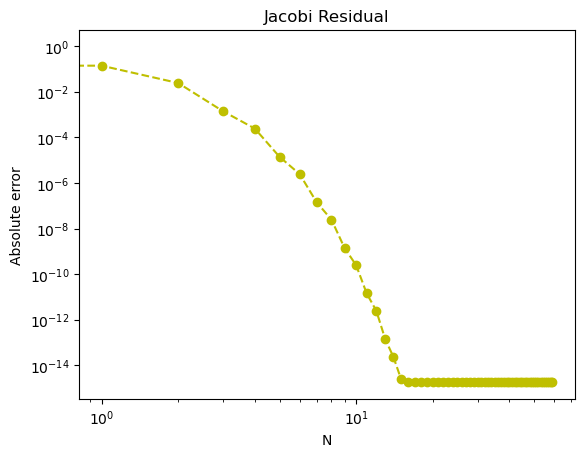

In [201]:
A = np.array([[10, 1, -1], [1, 10, -1], [-1, 1, 10]])
b = np.array([11, 10, 10])
x0 = np.array([1, 1, 1])
x = jacobi_method(A, b, x0, 100)
print(f'x = {x}')
jacobi_method_verification(A, b, x0)

# Succesive over relaxation

In [202]:
def sor_method(A, b, x0, N):
    n = len(A)
    L = np.array([[0]*n for i in range(n)])
    D = np.array([[0]*n for i in range(n)])
    U = np.array([[0]*n for i in range(n)])
    create_LDU(A, L, D, U)
    x = x0
    w = 1.5
    M = np.linalg.inv(D + w * L)
    B = -np.dot(M, ((w - 1) * D + w * U))
    C = w * M
    for it in range(N):
        x = B.dot(x) + C.dot(b)
    return x

def sor_method_verification(A, b, x0):
    N = 60
    x = list(i for i in range(N))
    y = []
    for i in range(N):
        xs = sor_method(A, b, x0, i)
        y.append(math.dist(np.dot(A, xs) , b))
    plt.yscale("log")
    plt.xscale("log")
    plt.title("SOR Residual")
    plt.plot(x, y, 'bo', linestyle = '--')
    plt.xlabel("N")
    plt.ylabel("Absolute error")

x = [1.1020202  0.99090909 1.01111111]


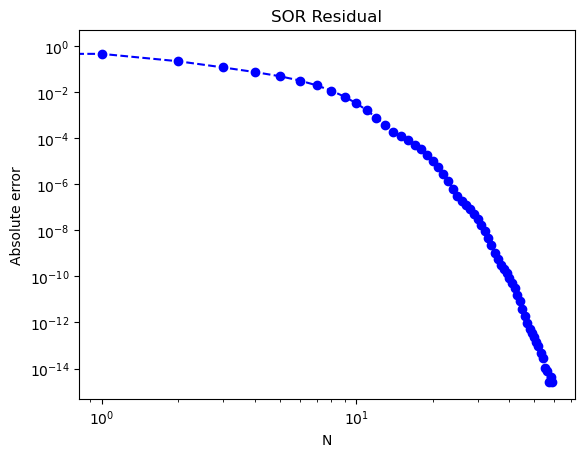

In [203]:
A = np.array([[10, 1, -1], [1, 10, -1], [-1, 1, 10]])
b = np.array([11, 10, 10])
x0 = np.array([1, 1, 1])
x = sor_method(A, b, x0, 100)
print(f'x = {x}')
sor_method_verification(A, b, x0)

# Задача II.10.6(a)

In [204]:
n = 100
A = [[0] * n for i in range(n)]
a = [1 for i in range(n - 2)]
b = [10 for i in range(n - 1)]
c = [1 for i in range(n - 1)]
for i in range(n):
    if (i != n - 1):
        A[i][i] = b[i]
    if (i > 0):
        A[i - 1][i] = c[i - 1]
    if (i < n - 2):
        A[i + 1][i] = a[i]
A[n - 1] = [1] * n
b = list(i for i in range(n))

In [205]:
print(gauss_method_verification(A, b))

The system of equations were solved succefully
True


In [206]:
print(lu_method_verification(A, b))

The system of equations were solved succefully
True


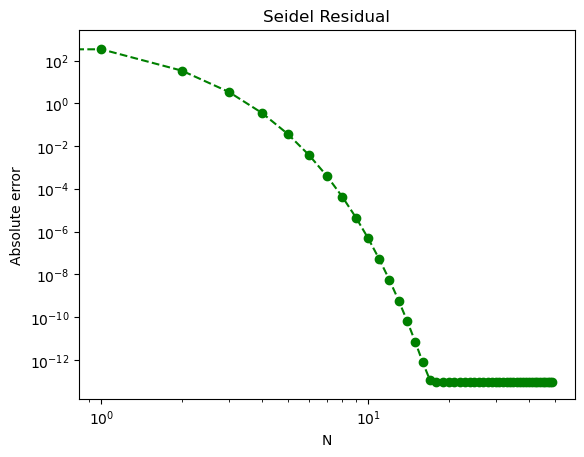

In [207]:
n = 100
A = np.array([[0] * n for i in range(n)])
a = np.array([1 for i in range(n - 2)])
b = np.array([10 for i in range(n - 1)])
c = np.array([1 for i in range(n - 1)])
for i in range(n):
    if (i != n - 1):
        A[i, i] = b[i]
    if (i > 0):
        A[i - 1, i] = c[i - 1]
    if (i < n - 2):
        A[i + 1, i] = a[i]
A[n - 1] = [1] * n
b = np.array([i for i in range(n)])
x0 = np.array([1] * n)
seidel_method_verification(A, b, x0)

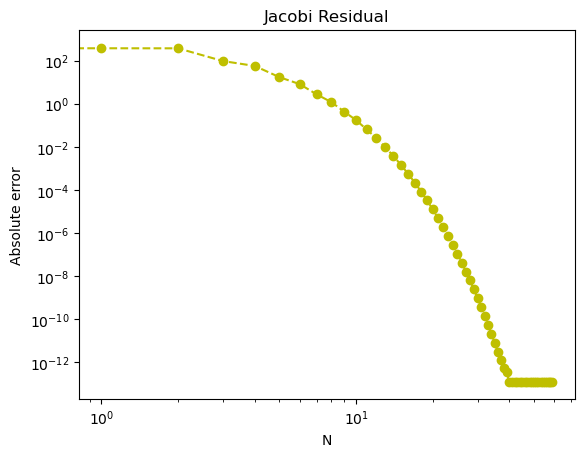

In [208]:
jacobi_method_verification(A, b, x0)

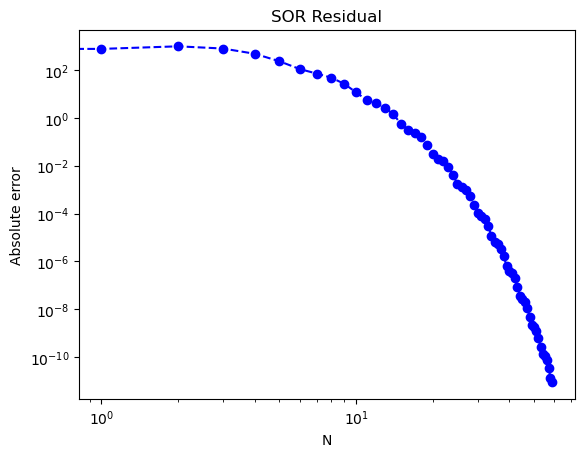

In [209]:
sor_method_verification(A, b, x0)